## Text Analysis in Bahasa Indonesia - Tempo.co

In [1]:
import csv
import pandas as pd
import numpy as np
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import re
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [2]:
train = pd.read_csv('tempoco.csv', encoding= 'utf8', sep=',')

In [3]:
train = train[['Title']]

In [4]:
train

,Title
0,OTT Bupati Mesuji Diduga Terkait Proyek Infras...
1,KPK Periksa Irjen Kementerian PUPR dalam Kasus...
2,KPK Menahan 8 Tersangka Kasus Suap Kementerian...
3,"OTT Kementerian PUPR, KPK Tetapkan 8 Orang seb..."
4,"Kasus Suap Kementerian PUPR, KPK Geledah Dua L..."
5,Begini Detail Kronologi OTT Kementerian PUPR d...
6,"Bawahannya Kena OTT KPK, Begini Reaksi Menteri..."
7,"20 Orang Terjaring OTT, Irjen Kementerian PUPR..."
8,"Kasus SPAM Kementerian PUPR, KPK Sita Deposito..."
9,"Kasus Suap SPAM Kementerian PUPR, Dari Toba hi..."


In [5]:
tags_lower = train['Title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [6]:
stop_words = list(get_stop_words('id'))         
nltk_words = list(stopwords.words('indonesian'))   
stop_words.extend(nltk_words)

In [7]:
word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [8]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [9]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]    

In [10]:
top_N = 10000

In [11]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

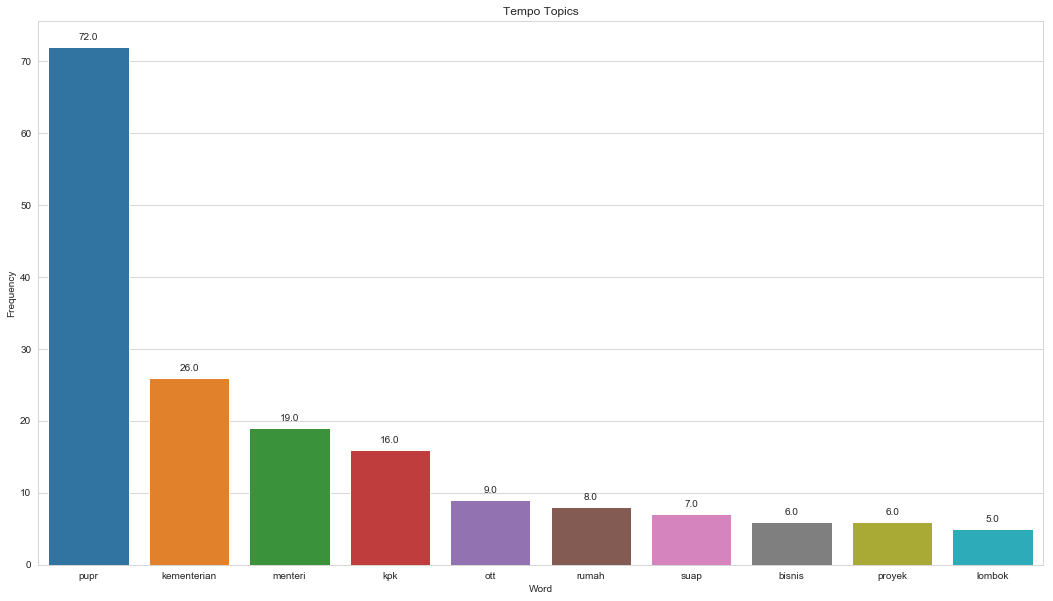

In [12]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
plt.title('Tempo Topics')
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(10))


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

In [13]:
bloblist_desc = list()

train_descr_str=train['Title'].astype(str)
for row in train_descr_str:
    blob = TextBlob(row)
    an = blob.translate(from_lang='id', to='en')
    bloblist_desc.append((row,an.sentiment.polarity, an.sentiment.subjectivity))
    train_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])


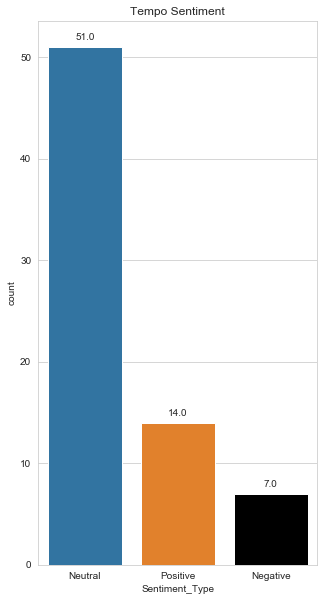

In [15]:
def f(train_polarity_desc):
    if train_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif train_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc['Sentiment_Type'] = train_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("whitegrid")
plt.title('Tempo Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc, palette=["C0", "C1", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)



In [19]:
an

TextBlob("Minister of PUPR Complaints on UN Disaster Mitigation Funds Still ...")

In [29]:
train_polarity1  = train_polarity_desc.rename(columns = {"sentiment": "polarity", "polarity":"subjectivity"})

In [30]:
train_polarity1

,sentence,polarity,subjectivity,Sentiment_Type
0,OTT Bupati Mesuji Diduga Terkait Proyek Infras...,0.000000,0.233333,Neutral
1,KPK Periksa Irjen Kementerian PUPR dalam Kasus...,0.050000,0.500000,Positive
2,KPK Menahan 8 Tersangka Kasus Suap Kementerian...,0.000000,0.000000,Neutral
3,"OTT Kementerian PUPR, KPK Tetapkan 8 Orang seb...",0.000000,0.000000,Neutral
4,"Kasus Suap Kementerian PUPR, KPK Geledah Dua L...",0.000000,0.000000,Neutral
5,Begini Detail Kronologi OTT Kementerian PUPR d...,0.000000,0.000000,Neutral
6,"Bawahannya Kena OTT KPK, Begini Reaksi Menteri...",0.000000,0.066667,Neutral
7,"20 Orang Terjaring OTT, Irjen Kementerian PUPR...",0.025000,0.283333,Positive
8,"Kasus SPAM Kementerian PUPR, KPK Sita Deposito...",0.000000,0.000000,Neutral
9,"Kasus Suap SPAM Kementerian PUPR, Dari Toba hi...",0.000000,0.000000,Neutral


In [28]:
blob.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)